# Dealing with Skewed Data

In this notebook we'll explore the implications of skewed data and some solutions to reduce the skewedness of the data if necessary.

### Import Basic Packages

In [2]:
#Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data & Describe Scenario

In this dataset we have many input varaibles that are being used to predict the **price** of a house.

In [3]:
# Import data to a pandas dataframe
df_house = pd.read_csv('kc_house_data.csv')
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,4254000620,20141007T000000,410000.0,3,2.50,1860,15457,2.0,0,0,...,8,1860,0,1997,0,98019,47.7383,-121.955,2040,14055
17994,6414100026,20150108T000000,320000.0,2,1.00,1802,11225,1.0,0,0,...,7,1802,0,1961,0,98125,47.7205,-122.323,1810,7332
17995,1346300035,20140626T000000,1990000.0,5,3.00,4480,5000,2.5,0,0,...,12,3420,1060,1902,0,98112,47.6275,-122.315,3220,5600
17996,2212210360,20140702T000000,253000.0,2,1.00,1310,7128,1.0,0,0,...,7,940,370,1980,0,98031,47.3958,-122.189,1400,7161


### Understanding skew

In [32]:
# Define the columns of interest for our transformation analysis


#cols_of_interest = df_house.select_dtypes('number').columns

In [31]:
# Show a basic histplot of each column

    
#Press shift o to remove the scroll from the box.

In [30]:
#Use the pandas skew function to calculate the skew of each numeric column


#### Interpretation of Skew Values
- Skew > 1 = high positive skew
- Skew > 0.5 = moderate positive skew

- Skew < -0.5 = moderate negative skew
- Skew < -1.0 = high negative skew

Other tests exist to **test for normality** of data, which include:
- Shapiro-Wilks test
- Kolmogorov–Smirnov test

### Solving Skew with Natural Logs

In [29]:
#Take the log of a single feature


In [28]:
# Show a basic histplot of the price column (the target variable in this case)


#Press shift o to remove the scroll from the box.

In [12]:
log_cols = ['log_price','log_sqft_living','log_sqft_lot']

### Alternatives to Natural Logs

In [ ]:
# log10 takes the log base 10 of each value. See also, log2, log1p
df_house['log10_price'] = np.log10(df_house['price'])
df_house

In [ ]:
# The square root transform can also be a helpful way to remove positive skew from a distribution
df_house['sqrt_price'] = np.sqrt(df_house['price'])
df_house

In [ ]:
# The cube root transform transforms the data even further
df_house['cbrt_price'] = np.cbrt(df_house['price'])
df_house

In [ ]:
# Alternatively, we can solve for left skew by raising all values of a feature to a power > 1.

#Note: In this case the price column is positively skewed, but code is provided as an example.
df_house['power2_price'] = np.power(df_house['price'],2)
df_house

**Further Reading**

If you wish to explore other methods, here are some recommendations:

- Box Cox Transformation - A semi automatic method for finding the optimal transformation for any POSITIVE feature.
- Power Transformer - SKLearn functionlity to implement boxcox and other transforms.

### Scenario 1 - Heteroskedastic Errors in A Linear Model

[Text(0.5, 1.0, 'sqft_living vs price')]

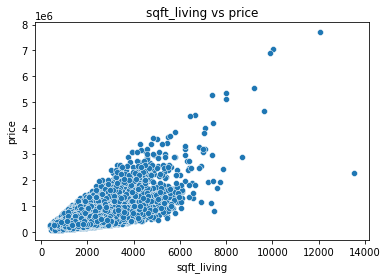

In [14]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="sqft_living", y="price")
ax.set(title = 'sqft_living vs price')

Here we can see clearly that plotting a linear model between these two variables would result in a growing error term the sqft_living increases.

In [15]:
df_house['log_price'] = np.log(df_house['price'])
df_house['log_sqft_living'] = np.log(df_house['sqft_living'])

[Text(0.5, 1.0, 'log_sft_living vs log_price')]

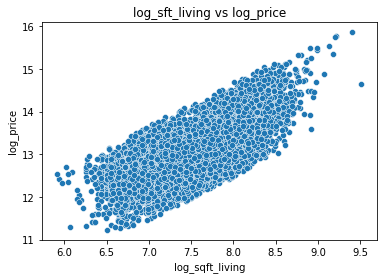

In [16]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="log_sqft_living", y="log_price")
ax.set(title = 'log_sft_living vs log_price')

Having performed a log-log transformation (log on dependent and independetn varaibles), we no longer have inconsistent errors.

### Scenario 2 - Fitting a Linear Model

[Text(0.5, 1.0, 'sqft_lot vs price')]

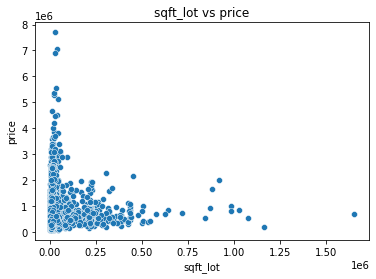

In [17]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="sqft_lot", y="price")
ax.set(title = 'sqft_lot vs price')

In this case, plotting a right skewed input against the right skewed target makes fitting a linear relationship particularly difficult.

In [18]:
df_house['log_price'] = np.log(df_house['price'])
df_house['log_sqft_lot'] = np.log(df_house['sqft_lot'])

[Text(0.5, 1.0, 'log_sqft_lot vs log_price')]

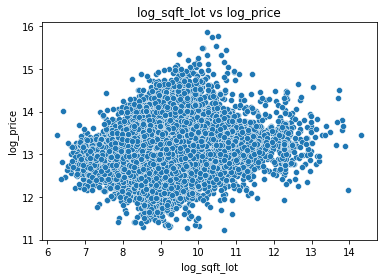

In [19]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="log_sqft_lot", y="log_price")
ax.set(title = 'log_sqft_lot vs log_price')

Having taken the log of both input and target, we create a much more interpretable relationship.

### Exercise 1 (Basic) - Identifying Skewedness of Variable

Task:
- Import the phones dataset
- Plot the battery life percentage column
- identify the skewedness of the variable.

In [27]:
# Import the phone marketplace dataset. Phone price is the target variable.
df_phone = pd.read_csv('phone_marketplace_dataset.csv')
df_phone

,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,original_sale_price,#_of_previous_owners,megapixel
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,747,1,12
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,888,1,16
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,1185,1,22
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,887,1,20
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,969,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1326,2022,iPhone_14,91,64,yes,craigslist,0,0,no,1394,1,22
345,458,2019,iPhone_11,75,256,no,facebook,3,3,no,702,2,12
346,487,2019,iPhone_11,87,256,no,facebook,1,7,no,781,2,12
347,1340,2022,iPhone_14,100,256,yes,craigslist,0,0,no,1411,1,22


In [20]:
# Plot the battery life percentage feature


In [21]:
# Calculate the skew value of the battery life percentage column


# is battery life highly negatively skewed, moderately negative, not skewed, moderately positive, or highly positive?

### Exercise 2 (Advanced) - Experiment with Transformations

Before you begin, think about which transformations are likely to help make this variable more normal.

Task:
- In a new column, calculate the natural log of the battery life column
- In a new column, calculate the log base 10 of the battery life column
- In a new column, calculate the square oot of the battery life column.
- In a new column, calculate the battery life column squared.
- In a new column, calculate the battery life column cubed.

- Plot the distributions on the same chart.
- Calcuate the skewedness of the new columns.
- Which one solved the skewedness most effectively?

In [22]:
# Create 4 new columns


In [23]:
# Create a list with the names of the 5 new columns


In [24]:
#Plot the 4 new columns together, and take a look at the new scales of each.


In [26]:
# Calculate the skew of each of the new columns


### Further Practice (Optional)

For further practice, try exercises 1 and 2 again, but using a positively skewed column.